In [2]:
%matplotlib inline

from collections import defaultdict
import numpy
import matplotlib
import seaborn
from matplotlib import pyplot as plt

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['savefig.dpi'] = 150
seaborn.set_context({"figure.figsize": (16, 12)})
seaborn.set_style('darkgrid')

In [3]:
def load_hists(filename):
    with open(filename, 'r') as infile:
        abund_hist = eval(next(infile))
        unique_hist = eval(next(infile))
    return abund_hist, unique_hist

In [4]:
kvalues = list(range(23, 59, 4))
muttype = ['snv', 'del']
abund_hists = defaultdict(dict)
unique_hists = defaultdict(dict)

for k in kvalues:
    for mt in muttype:
        infilename = 'k{}-{}.txt'.format(k, mt)
        ahist, uhist = load_hists(infilename)
        print(k, len(ahist), len(uhist))
        abund_hists[k][mt] = ahist
        unique_hists[k][mt] = uhist

23 17 24
23 17 24
27 17 28
27 17 28
31 17 32
31 17 32
35 17 36
35 17 36
39 17 40
39 17 40
43 17 44
43 17 44
47 17 48
47 17 48
51 17 52
51 17 52
55 17 56
55 17 56


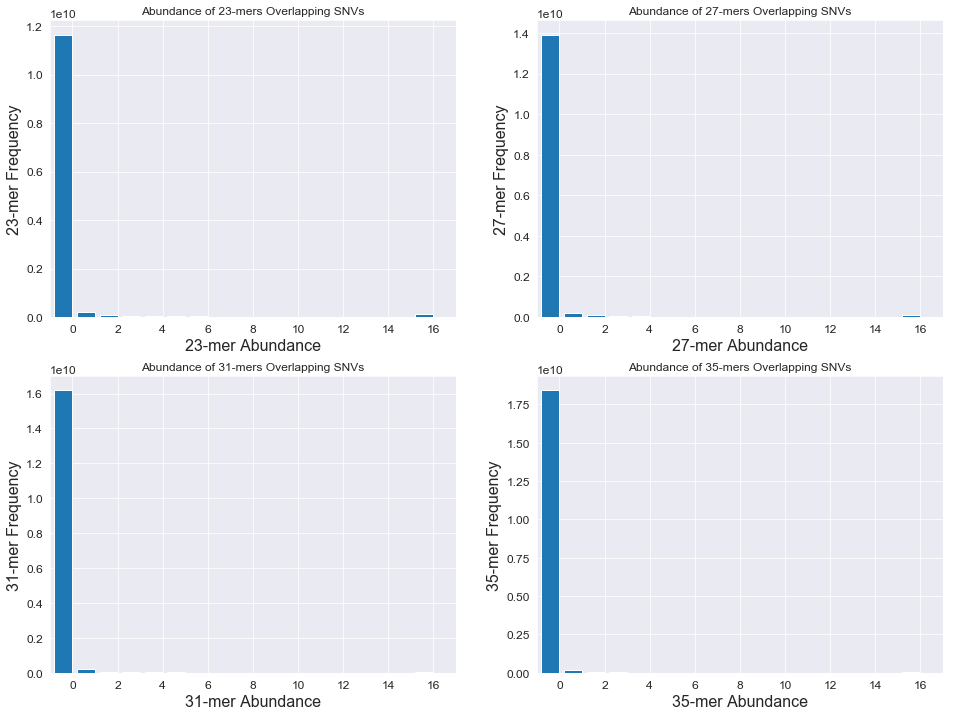

In [5]:
figure, axes = plt.subplots(2, 2, sharey=False)
axes = axes.ravel()
x = [n - 0.4 for n in range(16 + 1)]

_ = axes[0].bar(x, abund_hists[23]['snv'])
_ = axes[0].set_xlim(-1, 17)
_ = axes[0].set_xlabel('23-mer Abundance')
_ = axes[0].set_ylabel('23-mer Frequency')
_ = axes[0].set_title('Abundance of 23-mers Overlapping SNVs')

_ = axes[1].bar(x, abund_hists[27]['snv'])
_ = axes[1].set_xlim(-1, 17)
_ = axes[1].set_xlabel('27-mer Abundance')
_ = axes[1].set_ylabel('27-mer Frequency')
_ = axes[1].set_title('Abundance of 27-mers Overlapping SNVs')

_ = axes[2].bar(x, abund_hists[31]['snv'])
_ = axes[2].set_xlim(-1, 17)
_ = axes[2].set_xlabel('31-mer Abundance')
_ = axes[2].set_ylabel('31-mer Frequency')
_ = axes[2].set_title('Abundance of 31-mers Overlapping SNVs')

_ = axes[3].bar(x, abund_hists[35]['snv'])
_ = axes[3].set_xlim(-1, 17)
_ = axes[3].set_xlabel('35-mer Abundance')
_ = axes[3].set_ylabel('35-mer Frequency')
_ = axes[3].set_title('Abundance of 35-mers Overlapping SNVs')

plt.show()

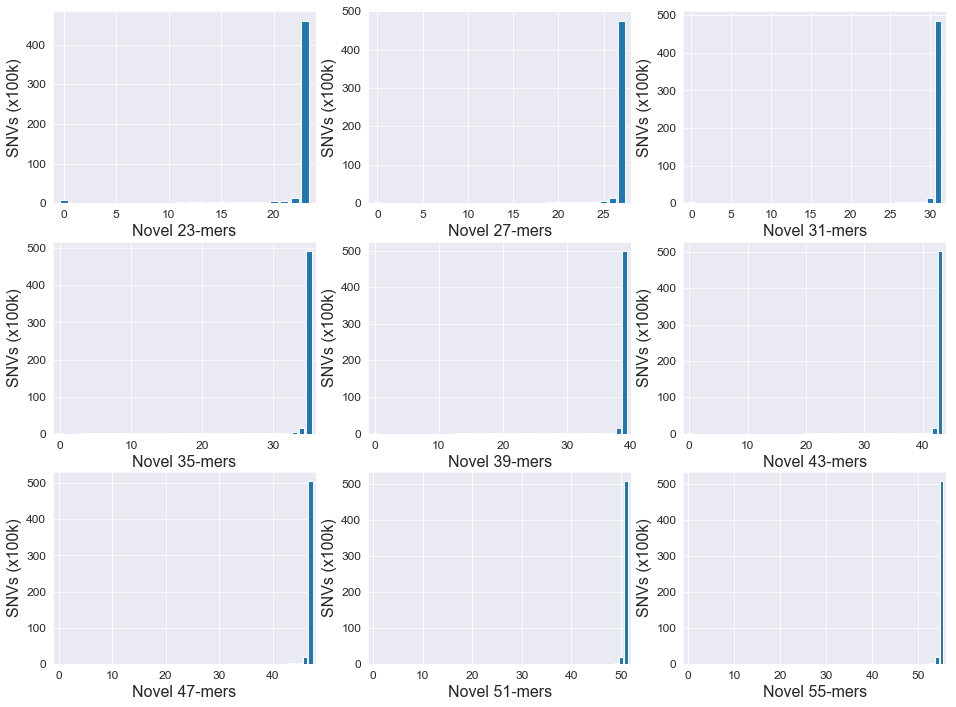

In [6]:
figure, axes = plt.subplots(3, 3, sharey=False)
axes = axes.ravel()

seaborn.set_context({"figure.figsize": (20, 16)})
for i, k in enumerate(kvalues):
    x = list(range(k + 1))

    _ = axes[i].bar(x, [y / 1e6 for y in unique_hists[k]['snv']])
    _ = axes[i].set_xlim(-1, k + 1)
    _ = axes[i].set_xlabel('Novel {}-mers'.format(k))
    _ = axes[i].set_ylabel('SNVs (x100k)')

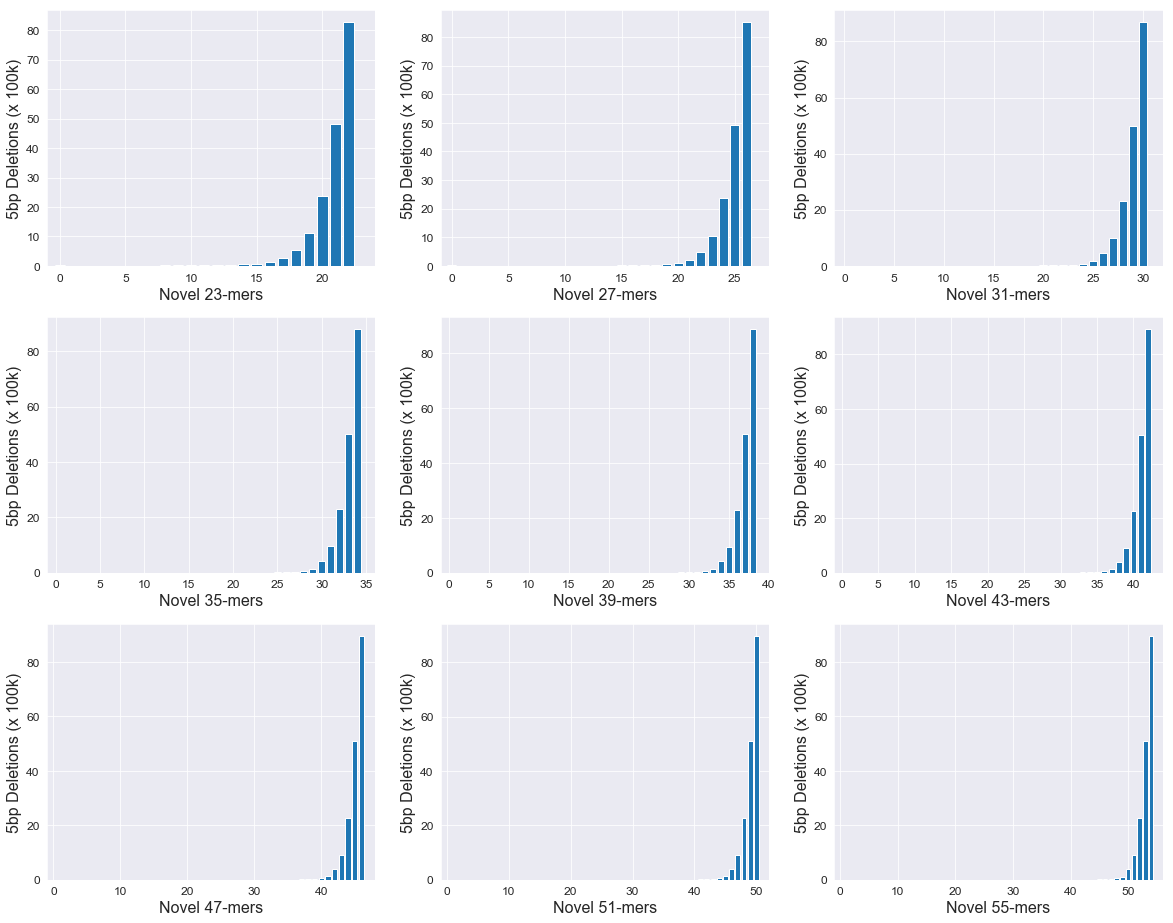

In [7]:
figure, axes = plt.subplots(3, 3, sharey=False)
axes = axes.ravel()

seaborn.set_context({"figure.figsize": (20, 16)})
for i, k in enumerate(kvalues):
    x = list(range(k + 1))

    _ = axes[i].bar(x, [y / 1e6 for y in unique_hists[k]['del']])
    _ = axes[i].set_xlim(-1, k + 1)
    _ = axes[i].set_xlabel('Novel {}-mers'.format(k))
    _ = axes[i].set_ylabel('5bp Deletions (x 100k)')